In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go

## Load and Explore the Data

In [3]:
# Load the Airline Passengers dataset
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['date'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('date')

In [4]:
# Explore the data
print(data.head())
print(data.info())

              Month  Passengers
date                           
1949-01-01  1949-01         112
1949-02-01  1949-02         118
1949-03-01  1949-03         132
1949-04-01  1949-04         129
1949-05-01  1949-05         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB
None


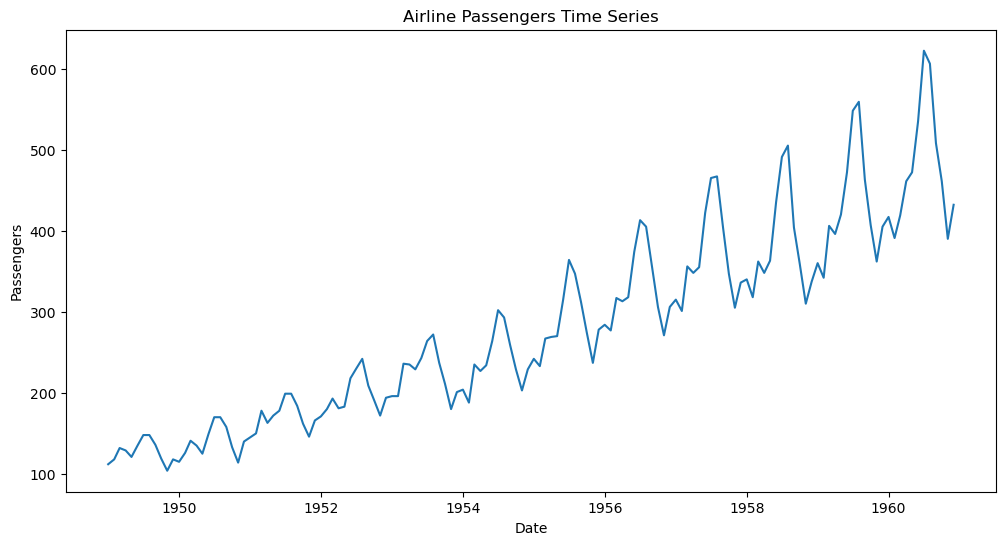

In [5]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'])
plt.title('Airline Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

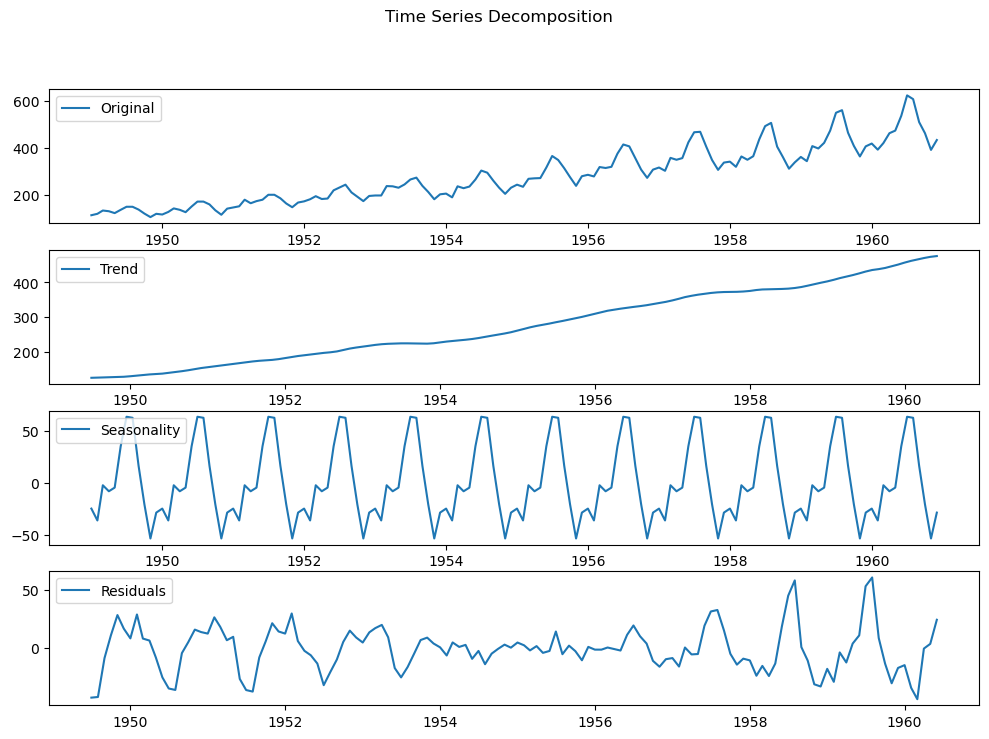

In [6]:
# Decompose the time series
decomposition = seasonal_decompose(data['Passengers'], period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data.index, data['Passengers'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(data.index, trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(data.index, seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(data.index, residual, label='Residuals')
plt.legend(loc='upper left')
plt.suptitle('Time Series Decomposition')
plt.show()

In [7]:
# Split the data into training and testing sets
train = data.iloc[:-12]
test = data.iloc[-12:]



/home/anas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/anas/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -447.111
Date:                            Tue, 20 Aug 2024   AIC                            902.221
Time:                                    19:10:25   BIC                            913.338
Sample:                                01-01-1949   HQIC                           906.735
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5385      0.330     -1.632      0.103      -1.185       0.108
ma.L1          0.3248      0.357   

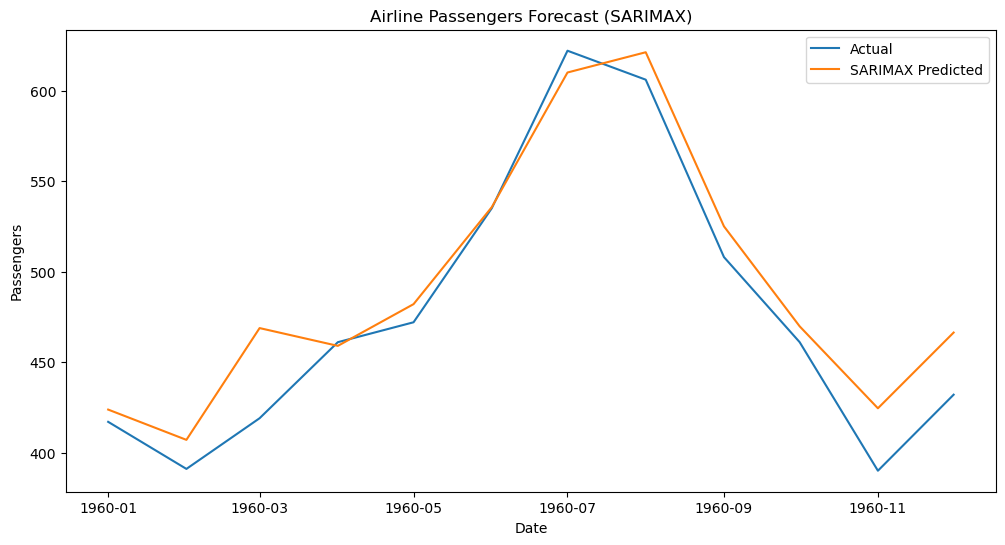

In [8]:
# Train a SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Passengers'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Make predictions on the test set
sarimax_predictions = model_fit.forecast(steps=12)

# Evaluate the SARIMAX model
sarimax_mse = mean_squared_error(test['Passengers'], sarimax_predictions)
sarimax_r2 = r2_score(test['Passengers'], sarimax_predictions)
print('SARIMAX Mean Squared Error:', sarimax_mse)
print('SARIMAX R-squared:', sarimax_r2)

# Visualize the SARIMAX predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Passengers'], label='Actual')
plt.plot(test.index, sarimax_predictions, label='SARIMAX Predicted')
plt.title('Airline Passengers Forecast (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

AttributeError: 'SARIMAXResults' object has no attribute 'make_future_dataframe'

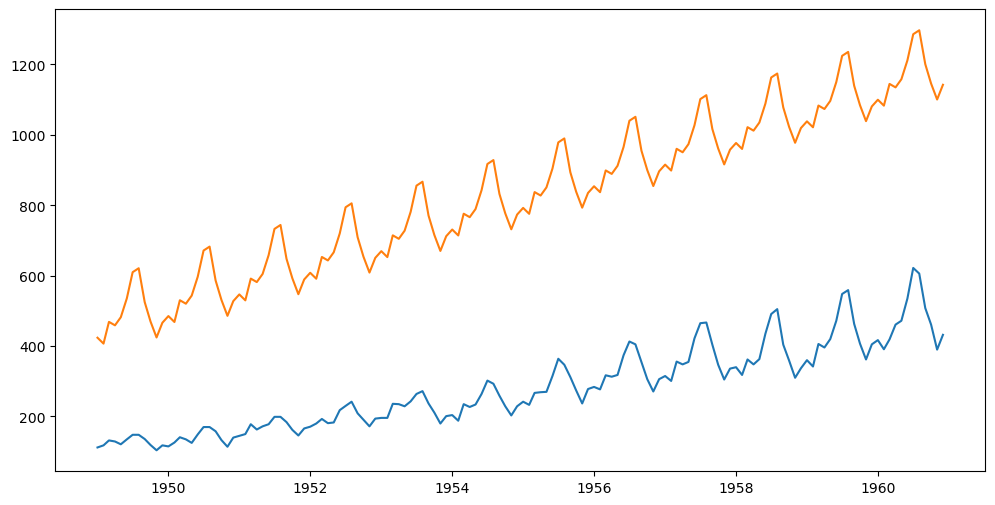

In [10]:
# Visualize the time series with predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], label='Actual')

# Plot SARIMAX predictions
sarimax_predictions = model_fit.forecast(len(data))
plt.plot(data.index, sarimax_predictions, label='SARIMAX Predicted')

# Plot Prophet predictions
prophet_future = model_fit.make_future_dataframe(periods=len(data))
prophet_forecast = model_fit.predict(prophet_future)
plt.plot(data.index, prophet_forecast['yhat'], label='Prophet Predicted')

plt.title('Airline Passengers Time Series with Forecasts')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

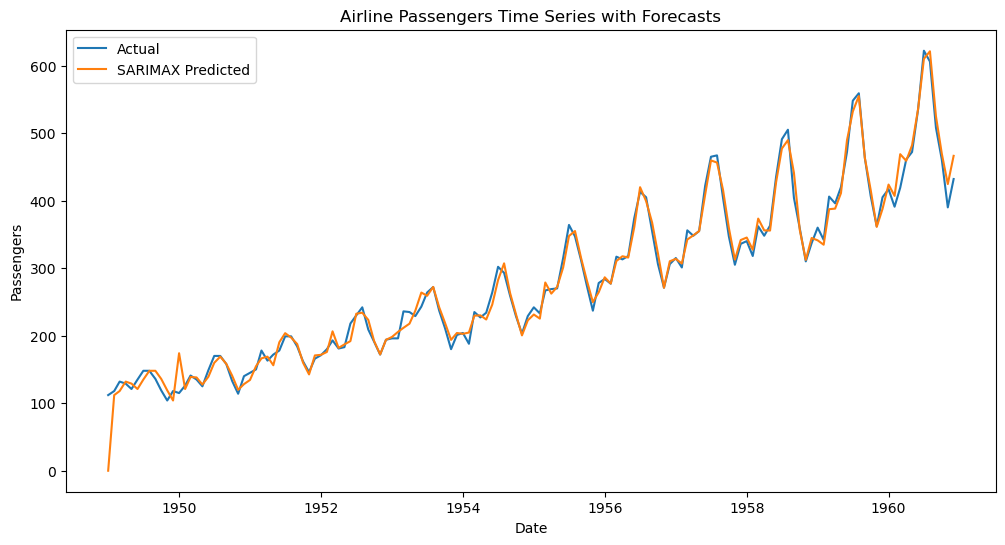

In [15]:
# Visualize the time series with predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Passengers'], label='Actual')

# Plot SARIMAX predictions
sarimax_results = model_fit.get_prediction(start=0, end=len(data)-1)
sarimax_predictions = sarimax_results.predicted_mean
plt.plot(data.index, sarimax_predictions, label='SARIMAX Predicted')

plt.title('Airline Passengers Time Series with Forecasts')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()